# Jupyter Support

This page is built by the Sphinx's `nbsphinx` extension. The raw file is a Python-kernel Jupyter Notebook file `JupyterSupport.ipynb` under the `subpage` folder of the Simrofy project.

For more details about Jupyter Notebook & Jupyter Lab, you can visit [Jupyter's official website](https://jupyter.org/).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Jupyter Notebook is famous for its plotting & data visualization along its Markdown-syntax typesetting. Let us have a quick look on these features.

## Plotting

There are some configurations for plotting, which are mentioned by `nbsphinx`. 

1. **Figure format**: Since Sphinx will builds all Jupyter notebook into HTML, we probably prefer SVG over PNG figures. 
2. **Figure dpi**: May increase the dpi (default is 72) for high resolution screen, especially when the format is PNG. 
2. **Random SVG**: Note that the figure output would be stored for the website, so we also need to avoid randomness in SVG generating -- both its content and its filename. Jupyter notebook has a `svg.hashsalt` option to control the "random seed".

We can create a `matplotrc` file in the same folder with our Jupyter notebook file, and write:

```
figure.dpi: 96
figure.figsize: 8, 6
font.size: 14.0
svg.hashsalt: mplsalt
```

The figure format is an option of IPython, so we can't configure it through matplotlib. We need to run it inside our Jupyter notebook:

In [2]:
# The PDF figure format is used when the noteboook is converted by LaTeX
%config InlineBackend.figure_formats = {'svg', 'pdf'}

Now we are pleased to draw a simple plot after finishing all these configurations.

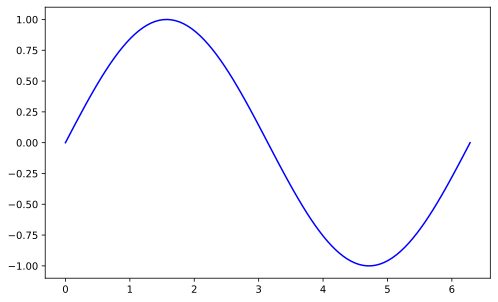

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Overwrite the rcParam figsize
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, 'b-')
plt.show()

## Data frame visualization

In [4]:
# Generate an array data and show its number of rows and columns
mat = np.array([x, y]).T
mat.shape

(100, 2)

In [5]:
df = pd.DataFrame(mat, columns=('x', 'sin(x)'))
df.head()

,x,sin(x)
0,0.000000,0.000000
1,0.063467,0.063424
2,0.126933,0.126592
3,0.190400,0.189251
4,0.253866,0.251148


We can control its display format by:

In [6]:
pd.options.display.float_format = '{:.4f}'.format

In [7]:
df.head()

,x,sin(x)
0,0.0000,0.0000
1,0.0635,0.0634
2,0.1269,0.1266
3,0.1904,0.1893
4,0.2539,0.2511


## Markdown syntax

All paragraphs in this Jupyter Notebook are written in Markdown syntax. For example, you can make:

- Italic *italic*,
- Bold **bold**, and
- Literal `literal` font styles.

Also, it's worthnoting that `nbsphinx` provides support for some admonitions.

<div class="alert alert-warning">
 
Warning

This is an *experimental feature*!
    
Its usage will probably change in the future or it might be removed completely!

</div>

Please **strictly follow this format** (including blank lines around div labels and the title "Warning") when you use this admonition feature.

```html
<div class="alert alert-warning">
 
Warning

This is an *experimental feature*!
Its usage will probably change in the future or it might be removed completely!

</div>
```

Up to current `nbsphinx` version (see below), it only supports "warning" and "info" (i.e. alert-info) admonitions.

In [8]:
import nbsphinx
print(nbsphinx.__version__)

0.7.1


## LaTeX equations and cross-references

The LaTeX equation is natively supported by Jupyter. When the Sphinx builds the Jupyter file into a HTML webpage, it uses the MathJax to render equations. For more details of equation usage in `nbsphinx`, you can visit [nbsphinx: Equations](https://nbsphinx.readthedocs.io/en/0.8.6/markdown-cells.html#Equations).

Please remember to **avoid indentation inside the equation**, otherwise the HTML builds may fail. 

Here is an example equation:

\begin{equation}
\int_0^\pi \sin^2 x \,dx = \frac{\pi}{2}
\label{eq:example}
\end{equation}

The text behind it is:

```
\begin{equation}
\int_0^\pi \sin^2 x \,dx = \frac{\pi}{2}
\label{eq:example}
\end{equation}
```

You can also use the asterisk-variant environment to produce equations without auto-numbering on the right.

### Auto-numbering

You can enable auto-numbering for the HTML output by adding following options to your `conf.py`:

```python
# For Sphinx >= 4.0
mathjax3_config = {
    'tex': {'tags': 'ams', 'useLabelIds': True},
}

# For older Sphinx
mathjax_config = {
    'TeX': {'equationNumbers': {'autoNumber': 'AMS', 'useLabelIds': True}},
}
```

### Cross-reference

You can refer the equation if you have given it a `\label{...}` field.

For the equation above, we can refer it by `\eqref{eq:example}` (which gives \eqref{eq:example}, a number in brackets) or `\ref{eq:example}` (\ref{eq:example}, a number without brackets).